In [18]:
import pandas as pd

# Load the data from the provided files
restaurants_kl = pd.read_csv('../dataset/Restaurants_KL.csv')
restaurants_rome = pd.read_csv('../dataset/Restaurants_Rome.csv')
reviews_kl = pd.read_csv('../dataset/reviews_all_KL.csv')
reviews_rome = pd.read_csv('../dataset/reviews_all_Rome.csv')

# Display the first few rows of each file to understand the structure
{
    "restaurants_kl_head": restaurants_kl.head(),
    "restaurants_rome_head": restaurants_rome.head(),
    "reviews_kl_head": reviews_kl.head(),
    "reviews_rome_head": reviews_rome.head()
}


{'restaurants_kl_head':                       Restaurant  star_rating no_reviews             cuisine  \
 0             Iketeru Restaurant          5.0      2,412   Japanese, Seafood   
 1          Ishin Japanese Dining          4.5      1,484     Japanese, Sushi   
 2                 Chambers Grill          5.0      1,001   Steakhouse, Grill   
 3  Canopy Rooftop Bar and Lounge          5.0      2,279  Bar, International   
 4               Kampachi Plaza33          5.0        779     Japanese, Sushi   
 
                                                  url  
 0  https://www.tripadvisor.com.my/Restaurant_Revi...  
 1  https://www.tripadvisor.com.my/Restaurant_Revi...  
 2  https://www.tripadvisor.com.my/Restaurant_Revi...  
 3  https://www.tripadvisor.com.my/Restaurant_Revi...  
 4  https://www.tripadvisor.com.my/Restaurant_Revi...  ,
 'restaurants_rome_head':                                      Restaurant  star_rating no_reviews  \
 0                        Adesso Vineria-bistrot   

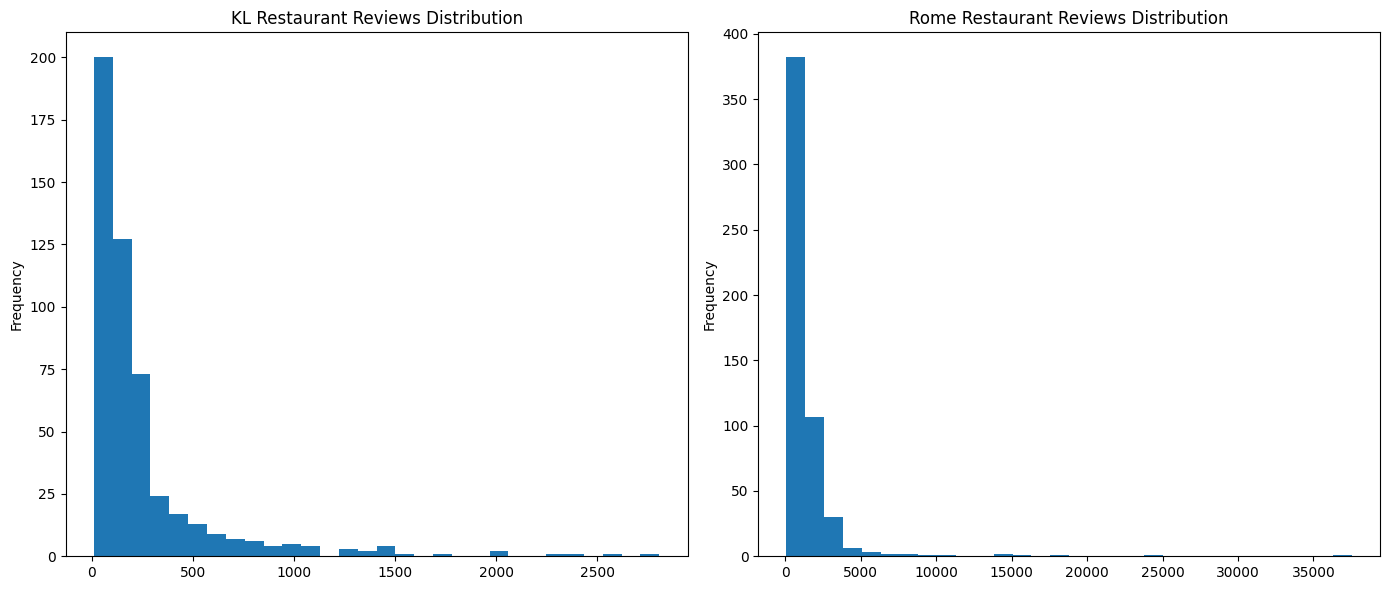

(count     506.000000
 mean      253.600791
 std       357.762024
 min        11.000000
 25%        68.000000
 50%       141.000000
 75%       263.000000
 max      2807.000000
 Name: no_reviews, dtype: float64,
 count      540.000000
 mean      1327.559259
 std       2559.242906
 min         66.000000
 25%        352.250000
 50%        727.000000
 75%       1502.500000
 max      37542.000000
 Name: no_reviews, dtype: float64,
 None)

In [19]:
import matplotlib.pyplot as plt

# Clean the 'no_reviews' column to ensure it's in numeric format
restaurants_kl['no_reviews'] = restaurants_kl['no_reviews'].str.replace(',', '').astype(int)
restaurants_rome['no_reviews'] = restaurants_rome['no_reviews'].str.replace(',', '').astype(int)

# Calculate the distribution of reviews for each restaurant in KL and Rome
review_distribution_kl = restaurants_kl['no_reviews'].describe()
review_distribution_rome = restaurants_rome['no_reviews'].describe()

# Plot the distribution of reviews for each restaurant
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
restaurants_kl['no_reviews'].plot(kind='hist', bins=30, ax=ax1, title='KL Restaurant Reviews Distribution')
restaurants_rome['no_reviews'].plot(kind='hist', bins=30, ax=ax2, title='Rome Restaurant Reviews Distribution')
plt.tight_layout()

review_distribution_kl, review_distribution_rome, plt.show()


In [20]:
# Calculate the distribution of unique users in reviews for KL and Rome
unique_users_kl = reviews_kl['Author'].nunique()
unique_users_rome = reviews_rome['Author'].nunique()

# Count total reviews for comparison
total_reviews_kl = reviews_kl['Author'].count()
total_reviews_rome = reviews_rome['Author'].count()

# Calculate the ratio of unique users to total reviews
unique_to_total_ratio_kl = unique_users_kl / total_reviews_kl
unique_to_total_ratio_rome = unique_users_rome / total_reviews_rome

{
    "unique_users_kl": unique_users_kl,
    "total_reviews_kl": total_reviews_kl,
    "unique_to_total_ratio_kl": unique_to_total_ratio_kl,
    "unique_users_rome": unique_users_rome,
    "total_reviews_rome": total_reviews_rome,
    "unique_to_total_ratio_rome": unique_to_total_ratio_rome
}


{'unique_users_kl': 29885,
 'total_reviews_kl': 38660,
 'unique_to_total_ratio_kl': 0.7730212105535437,
 'unique_users_rome': 29118,
 'total_reviews_rome': 31661,
 'unique_to_total_ratio_rome': 0.9196803638545845}

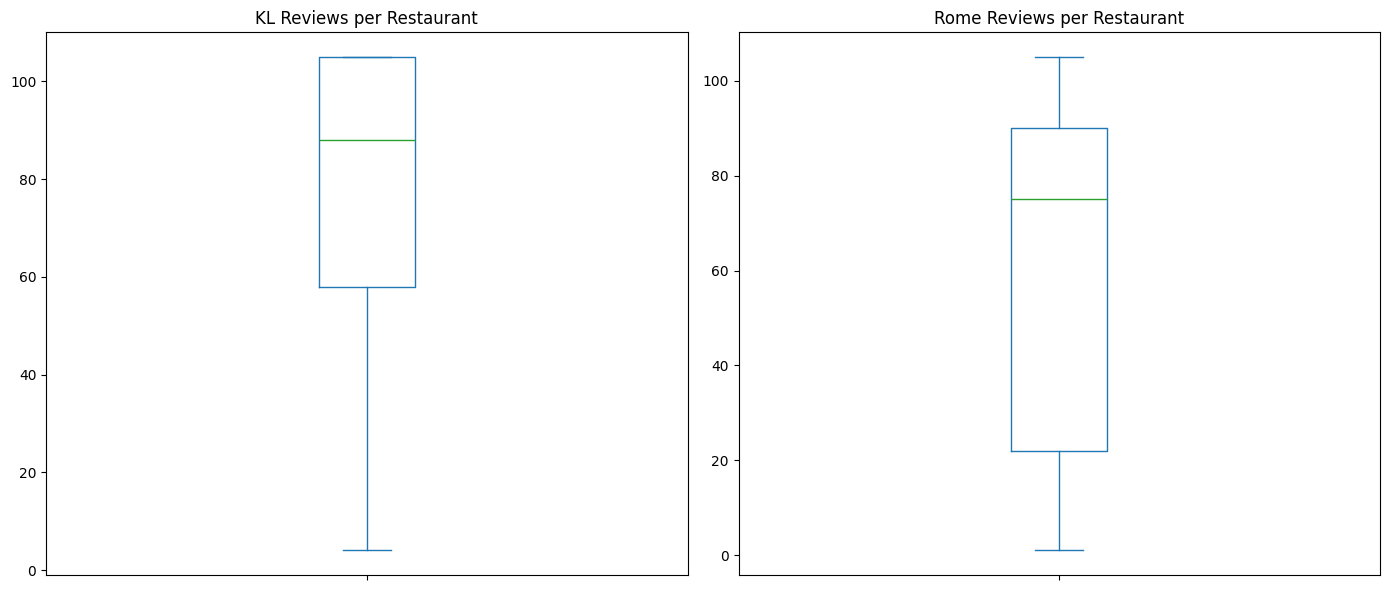

(count    506.000000
 mean      76.403162
 std       26.832438
 min        4.000000
 25%       58.000000
 50%       88.000000
 75%      105.000000
 max      105.000000
 dtype: float64,
 count    540.000000
 mean      58.631481
 std       34.337776
 min        1.000000
 25%       22.000000
 50%       75.000000
 75%       90.000000
 max      105.000000
 dtype: float64,
 None)

In [21]:
# Assessing the difficulty based on volume and variability
# High volume and high variability might indicate more complex data analysis

# Get a basic statistical overview of the number of reviews for both cities
review_count_stats_kl = reviews_kl.groupby('Restaurant').size().describe()
review_count_stats_rome = reviews_rome.groupby('Restaurant').size().describe()

# Plot the number of reviews per restaurant to visualize the spread and identify any outliers or heavy tails
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
reviews_kl.groupby('Restaurant').size().plot(kind='box', ax=ax1, title='KL Reviews per Restaurant')
reviews_rome.groupby('Restaurant').size().plot(kind='box', ax=ax2, title='Rome Reviews per Restaurant')
plt.tight_layout()

review_count_stats_kl, review_count_stats_rome, plt.show()


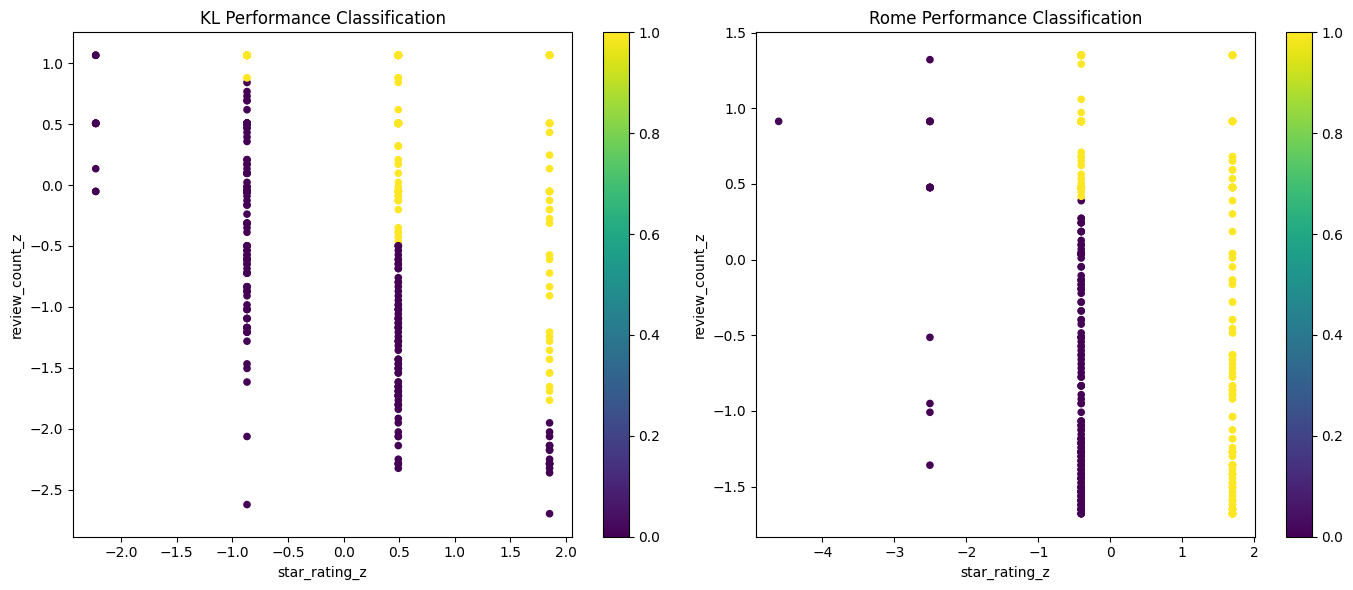

(0.4841897233201581, 0.6666666666666666, None)

In [22]:
# Adding a proper name to the series representing the count of reviews for each restaurant
review_count_kl = reviews_kl.groupby('Restaurant').size().rename('review_count')
review_count_rome = reviews_rome.groupby('Restaurant').size().rename('review_count')

# Merge review count data with restaurant data for more comprehensive analysis
kl_data = restaurants_kl.set_index('Restaurant').join(review_count_kl, how='left')
rome_data = restaurants_rome.set_index('Restaurant').join(review_count_rome, how='left')

# Normalize data by calculating z-scores for star ratings and review counts to compare performance
kl_data['star_rating_z'] = (kl_data['star_rating'] - kl_data['star_rating'].mean()) / kl_data['star_rating'].std()
kl_data['review_count_z'] = (kl_data['review_count'] - kl_data['review_count'].mean()) / kl_data['review_count'].std()
rome_data['star_rating_z'] = (rome_data['star_rating'] - rome_data['star_rating'].mean()) / rome_data['star_rating'].std()
rome_data['review_count_z'] = (rome_data['review_count'] - rome_data['review_count'].mean()) / rome_data['review_count'].std()

# Classify based on z-scores
kl_data['performance_class'] = pd.cut(kl_data['star_rating_z'] + kl_data['review_count_z'], bins=[-float('inf'), 0, float('inf')], labels=['Lower', 'Higher'])
rome_data['performance_class'] = pd.cut(rome_data['star_rating_z'] + rome_data['review_count_z'], bins=[-float('inf'), 0, float('inf')], labels=['Lower', 'Higher'])

# Plotting the classification
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
kl_data.plot.scatter(x='star_rating_z', y='review_count_z', c=kl_data['performance_class'].cat.codes, colormap='viridis', ax=ax1, title='KL Performance Classification')
rome_data.plot.scatter(x='star_rating_z', y='review_count_z', c=rome_data['performance_class'].cat.codes, colormap='viridis', ax=ax2, title='Rome Performance Classification')
plt.tight_layout()

# Show the figures and return the proportion of high performance restaurants
high_perf_kl = kl_data['performance_class'].value_counts(normalize=True)['Higher']
high_perf_rome = rome_data['performance_class'].value_counts(normalize=True)['Higher']

high_perf_kl, high_perf_rome, plt.show()


In [23]:
# Filter out rows with NaT values in the 'Dates' column
filtered_reviews_kl = reviews_kl.dropna(subset=['Dates'])
filtered_reviews_rome = reviews_rome.dropna(subset=['Dates'])

# Time-series analysis: Count reviews over time by month
time_series_kl = filtered_reviews_kl.set_index('Dates').resample('M').size()
time_series_rome = filtered_reviews_rome.set_index('Dates').resample('M').size()

# Plotting time-series of review counts
plt.figure(figsize=(14, 6))
plt.plot(time_series_kl.index, time_series_kl.values, label='KL')
plt.plot(time_series_rome.index, time_series_rome.values, label='Rome')
plt.title('Time-Series Analysis of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.tight_layout()

# Now we recalculate the basic statistics for restaurant data between KL and Rome without the time-series error
restaurant_comparison


/var/folders/0m/yftchj_d2jx9ww452vnwrkgh0000gn/T/ipykernel_26651/8679978.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_kl = filtered_reviews_kl.set_index('Dates').resample('M').size()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

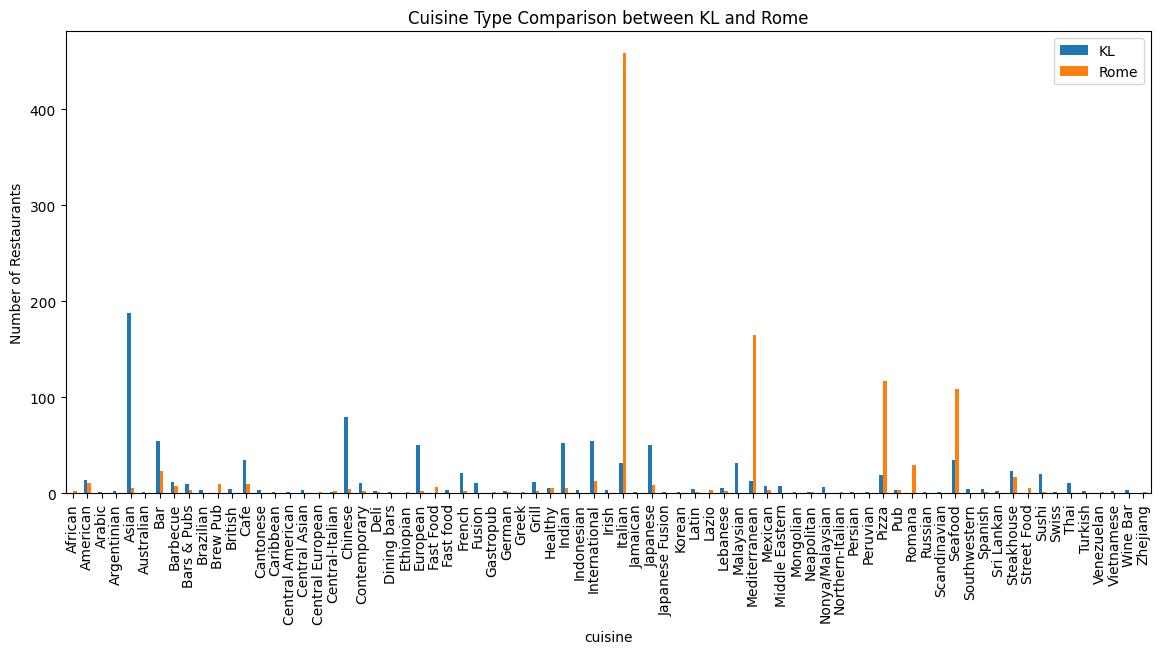

(63, 44, None)

In [ ]:
# Analyze the cuisine type / cuisine type number differences between KL and Rome

# Extract and count unique cuisine types for each city
kl_cuisines = restaurants_kl['cuisine'].str.split(', ').explode().unique()
rome_cuisines = restaurants_rome['cuisine'].str.split(', ').explode().unique()

# Count the number of different cuisine types
kl_cuisine_count = len(kl_cuisines)
rome_cuisine_count = len(rome_cuisines)

# Prepare data for visualization
cuisine_comparison = pd.DataFrame({
    'KL': pd.Series(restaurants_kl['cuisine'].str.split(', ').explode()).value_counts(),
    'Rome': pd.Series(restaurants_rome['cuisine'].str.split(', ').explode()).value_counts()
})

# Plot the cuisine type comparison
cuisine_comparison.plot(kind='bar', figsize=(14, 6), title='Cuisine Type Comparison between KL and Rome')
plt.ylabel('Number of Restaurants')

kl_cuisine_count, rome_cuisine_count, plt.show()


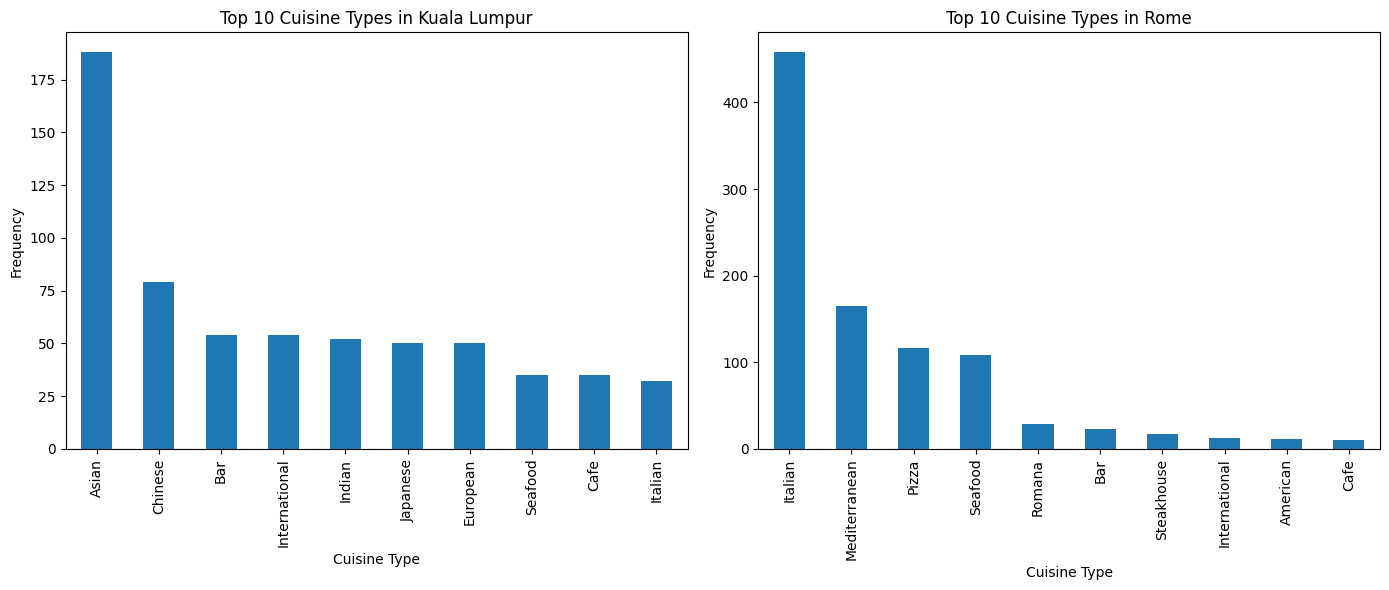

(('Asian', 188), ('Caribbean', 1), ('Italian', 458), ('Deli', 1))

In [ ]:
# Extracting and counting cuisine types for each city
cuisines_kl = restaurants_kl['cuisine'].str.split(', ').explode().value_counts()
cuisines_rome = restaurants_rome['cuisine'].str.split(', ').explode().value_counts()

# Identifying the maximum and minimum cuisine types
max_cuisine_kl = cuisines_kl.idxmax(), cuisines_kl.max()
min_cuisine_kl = cuisines_kl.idxmin(), cuisines_kl.min()
max_cuisine_rome = cuisines_rome.idxmax(), cuisines_rome.max()
min_cuisine_rome = cuisines_rome.idxmin(), cuisines_rome.min()

# Plotting the cuisine type distribution
plt.figure(figsize=(14, 6))

# Kuala Lumpur
plt.subplot(1, 2, 1)
cuisines_kl.head(10).plot(kind='bar')
plt.title('Top 10 Cuisine Types in Kuala Lumpur')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')

# Rome
plt.subplot(1, 2, 2)
cuisines_rome.head(10).plot(kind='bar')
plt.title('Top 10 Cuisine Types in Rome')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

max_cuisine_kl, min_cuisine_kl, max_cuisine_rome, min_cuisine_rome


/var/folders/0m/yftchj_d2jx9ww452vnwrkgh0000gn/T/ipykernel_26651/25277430.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reviews_kl['Dates'] = pd.to_datetime(reviews_kl['Dates'].str.extract('Reviewed (.*)')[0], errors='coerce', utc=True)
/var/folders/0m/yftchj_d2jx9ww452vnwrkgh0000gn/T/ipykernel_26651/25277430.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reviews_rome['Dates'] = pd.to_datetime(reviews_rome['Dates'].str.extract('Reviewed (.*)')[0], errors='coerce', utc=True)


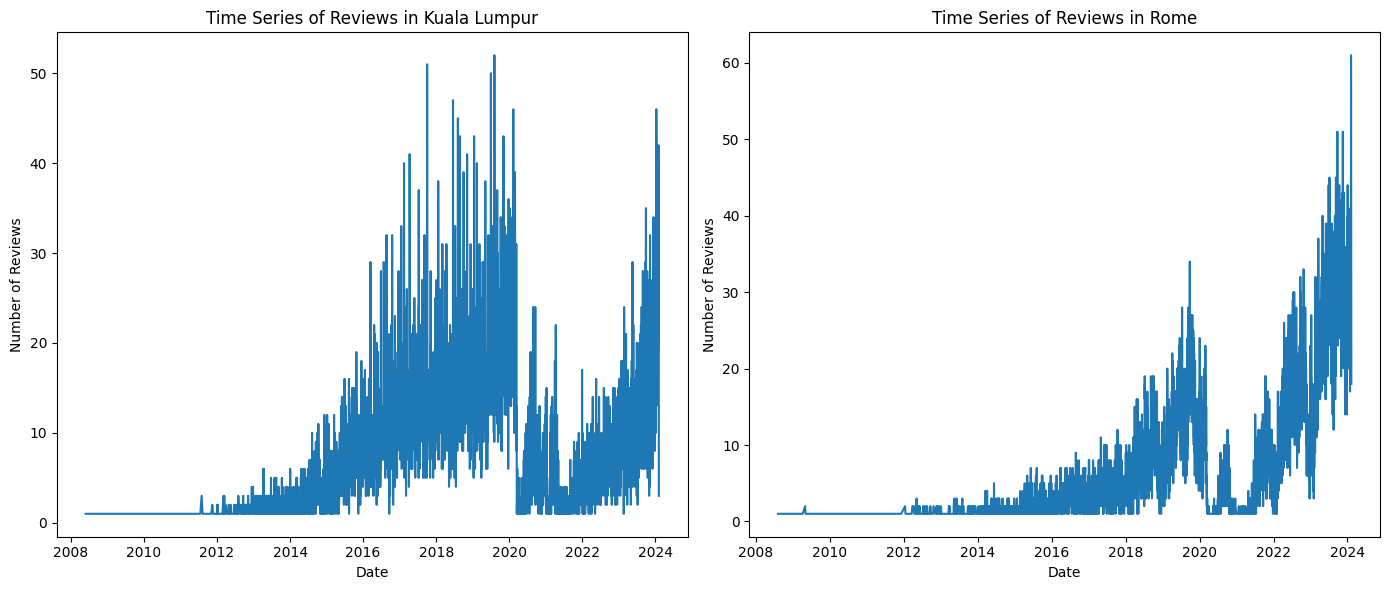

In [ ]:
# Converting the 'Dates' column to datetime for both reviews datasets
reviews_kl['Dates'] = pd.to_datetime(reviews_kl['Dates'].str.extract('Reviewed (.*)')[0], errors='coerce', utc=True)
reviews_rome['Dates'] = pd.to_datetime(reviews_rome['Dates'].str.extract('Reviewed (.*)')[0], errors='coerce', utc=True)

# Grouping by date to get the number of reviews per day
time_series_kl = reviews_kl.groupby(reviews_kl['Dates'].dt.date).size()
time_series_rome = reviews_rome.groupby(reviews_rome['Dates'].dt.date).size()

# Plotting the time-series of reviews
plt.figure(figsize=(14, 6))

# Kuala Lumpur
plt.subplot(1, 2, 1)
time_series_kl.plot(title='Time Series of Reviews in Kuala Lumpur', xlabel='Date', ylabel='Number of Reviews')

# Rome
plt.subplot(1, 2, 2)
time_series_rome.plot(title='Time Series of Reviews in Rome', xlabel='Date', ylabel='Number of Reviews')

plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

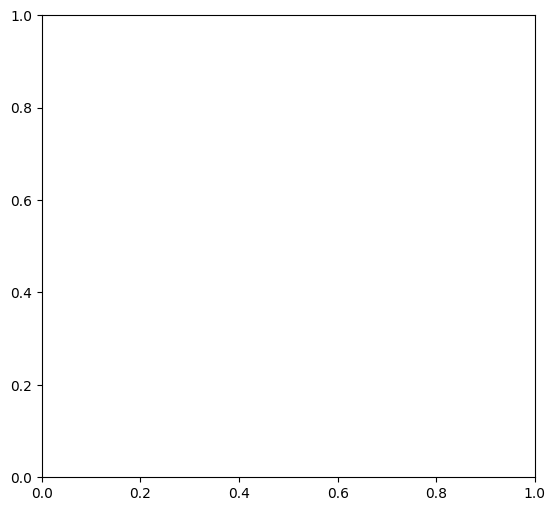

In [ ]:
# Calculate the length of each review in terms of word count
reviews_kl['Review_Length'] = reviews_kl['Review'].str.split().apply(len)
reviews_rome['Review_Length'] = reviews_rome['Review'].str.split().apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(14, 6))

# Kuala Lumpur
plt.subplot(1, 2, 1)
sns.histplot(reviews_kl['Review_Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths in Kuala Lumpur')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')

# Rome
plt.subplot(1, 2, 2)
sns.histplot(reviews_rome_df['Review_Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths in Rome')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the 'no_reviews' column and convert it to numeric for both restaurant datasets
restaurants_kl['no_reviews'] = restaurants_kl['no_reviews'].str.replace(',', '').astype(int)
restaurants_rome['no_reviews'] = restaurants_rome['no_reviews'].str.replace(',', '').astype(int)

# Plotting the distribution of reviews for restaurants in Kuala Lumpur and Rome
plt.figure(figsize=(12, 6))

# Kuala Lumpur
plt.subplot(1, 2, 1)
sns.histplot(restaurants_kl['no_reviews'], bins=30, kde=True)
plt.title('Distribution of Reviews in Kuala Lumpur Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

# Rome
plt.subplot(1, 2, 2)
sns.histplot(restaurants_rome_df['no_reviews'], bins=30, kde=True)
plt.title('Distribution of Reviews in Rome Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

NameError: name 'sns' is not defined

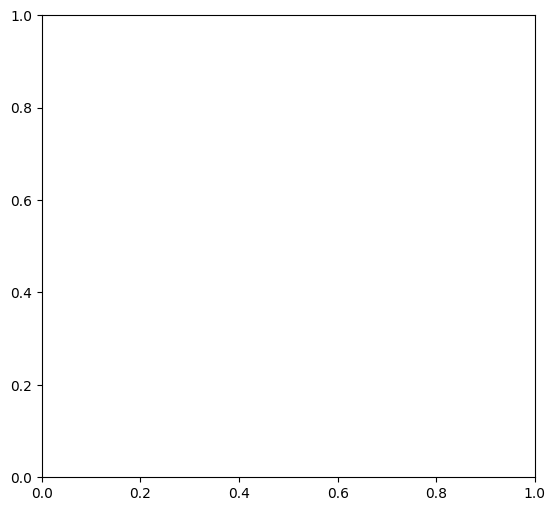

In [24]:
# Calculate the length of each review in terms of word count
reviews_kl['Review_Length'] = reviews_kl['Review'].str.split().apply(len)
reviews_rome['Review_Length'] = reviews_rome['Review'].str.split().apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(14, 6))

# Kuala Lumpur
plt.subplot(1, 2, 1)
sns.histplot(reviews_kl['Review_Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths in Kuala Lumpur')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')

# Rome
plt.subplot(1, 2, 2)
sns.histplot(reviews_rome_df['Review_Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths in Rome')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [25]:
# Counting the number of reviews submitted by each author for both cities
reviewer_experience_kl = reviews_kl_df['Author'].value_counts()
reviewer_experience_rome = reviews_rome_df['Author'].value_counts()

# Plotting the distribution of reviewer experience
plt.figure(figsize=(14, 6))

# Kuala Lumpur
plt.subplot(1, 2, 1)
sns.histplot(reviewer_experience_kl, bins=50, log_scale=(False, True))
plt.title('Distribution of Reviewer Experience in Kuala Lumpur')
plt.xlabel('Number of Reviews per Author')
plt.ylabel('Frequency (log scale)')

# Rome
plt.subplot(1, 2, 2)
sns.histplot(reviewer_experience_rome, bins=50, log_scale=(False, True))
plt.title('Distribution of Reviewer Experience in Rome')
plt.xlabel('Number of Reviews per Author')
plt.ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()

NameError: name 'reviews_kl_df' is not defined